# Deep Learning Assignment 2 – CIFAR-10

**Author:** Haroon Abbas  
**Course:** Deep Learning / Computer Vision Assignment 2

**Objective:** Implement a Convolutional Neural Network (CNN) for image classification using the CIFAR-10 dataset. This notebook includes data loading, preprocessing, model building, training with EarlyStopping, evaluation (confusion matrix + classification report), and visualization of correct/incorrect predictions.


In [1]:
# 1. IMPORT LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report

print('Libraries imported successfully.')

Libraries imported successfully.


In [2]:
# 2. LOAD CIFAR-10 DATA
print('📥 Loading CIFAR-10 dataset...')
(X, y), (X_test_original, y_test_original) = cifar10.load_data()
y = y.flatten()
y_test_original = y_test_original.flatten()

print('➡ Original Dataset Shape:', X.shape)
print('➡ Labels Shape:', y.shape)

class_names = ['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

📥 Loading CIFAR-10 dataset...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
➡ Original Dataset Shape: (50000, 32, 32, 3)
➡ Labels Shape: (50000,)


In [3]:
# 3. SPLIT 75% TRAIN / 25% TEST
print('\n🔄 Splitting dataset 75/25...')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)
print('📊 Train Shape:', X_train.shape)
print('📊 Test Shape:', X_test.shape)


🔄 Splitting dataset 75/25...
📊 Train Shape: (37500, 32, 32, 3)
📊 Test Shape: (12500, 32, 32, 3)



✨ Preprocessing images (normalization + one-hot labels)...


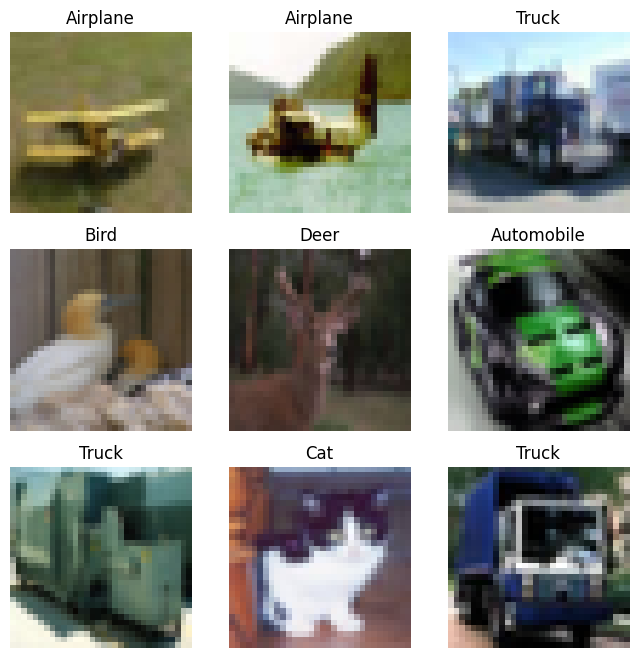

In [4]:
# 4. PREPROCESSING
print('\n✨ Preprocessing images (normalization + one-hot labels)...')
X_train = X_train / 255.0
X_test = X_test / 255.0

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Display sample images
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.show()

In [16]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Dropout, BatchNormalization

model = Sequential([
    Input(shape=(32,32,3)),

    Conv2D(32, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')
])

model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 621,258 (2.37 MB)

 Trainable params: 620,810 (2.37 MB)

 Non-trainable params: 448 (1.75 KB)

In [23]:
# 6. COMPILE + TRAIN
print('\n⚙ Compiling model...')
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
print('\n⏳ Starting training... (10 epochs, EarlyStopping)')
history = model.fit(X_train, y_train_cat, epochs=10, validation_split=0.2, callbacks=[early_stop])


⚙ Compiling model...

⏳ Starting training... (10 epochs, EarlyStopping)
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 117s 121ms/step - accuracy: 0.3636 - loss: 1.8895 - val_accuracy: 0.5077 - val_loss: 1.4218
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 116s 124ms/step - accuracy: 0.5583 - loss: 1.2396 - val_accuracy: 0.5163 - val_loss: 1.3864
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 140s 121ms/step - accuracy: 0.6360 - loss: 1.0348 - val_accuracy: 0.6083 - val_loss: 1.1830
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 145s 125ms/step - accuracy: 0.6936 - loss: 0.8789 - val_accuracy: 0.6515 - val_loss: 1.0678
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 113s 121ms/step - accuracy: 0.7292 - loss: 0.7809 - val_accuracy: 0.6460 - val_loss: 1.0539
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 140s 118ms/step - accuracy: 0.7641 - loss: 0.6778 - val_accuracy: 0.7095 - val_loss: 0.8846
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 147s 123ms/step - accuracy: 0.7917 - loss: 0.5985 - val_accuracy: 0.6005 - val_loss: 1.2660
Epo


📈 Plotting training graphs...


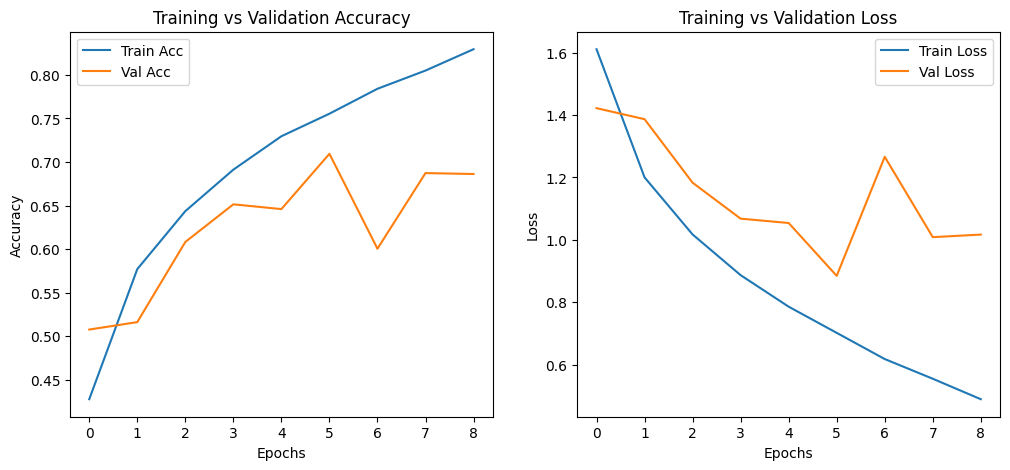

In [24]:
# 7. PLOT TRAINING GRAPHS
print('\n📈 Plotting training graphs...')
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.xlabel('Epochs'); plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.xlabel('Epochs'); plt.ylabel('Loss')
plt.title('Training vs Validation Loss')

plt.show()

In [25]:
# 8. EVALUATION ON TEST SET
print('\n🧪 Evaluating on test set...')
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=2)
print('🎯 Test Accuracy:', test_acc)
print('📉 Test Loss:', test_loss)


🧪 Evaluating on test set...
391/391 - 10s - 26ms/step - accuracy: 0.7044 - loss: 0.8866
🎯 Test Accuracy: 0.7044000029563904
📉 Test Loss: 0.8865865468978882



📘 Generating confusion matrix and classification report...
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step


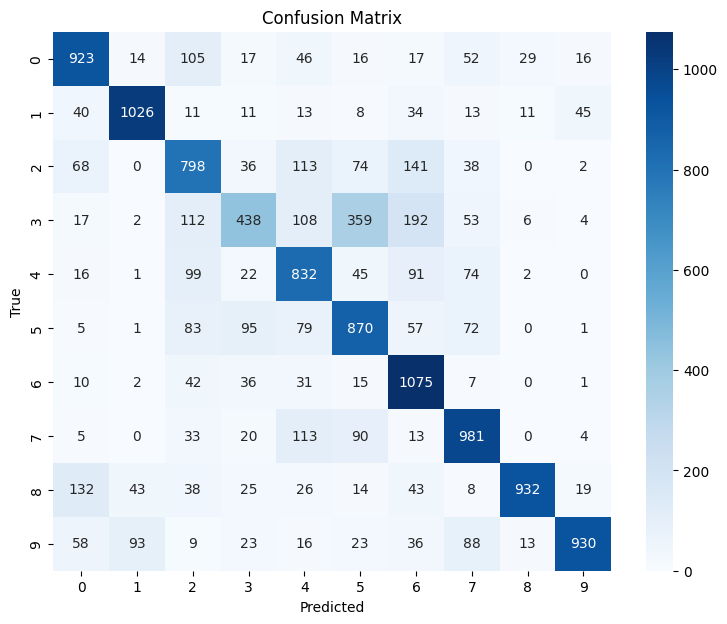


📄 Classification Report:
              precision    recall  f1-score   support

    Airplane       0.72      0.75      0.74      1235
  Automobile       0.87      0.85      0.86      1212
        Bird       0.60      0.63      0.61      1270
         Cat       0.61      0.34      0.43      1291
        Deer       0.60      0.70      0.65      1182
         Dog       0.57      0.69      0.63      1263
        Frog       0.63      0.88      0.74      1219
       Horse       0.71      0.78      0.74      1259
        Ship       0.94      0.73      0.82      1280
       Truck       0.91      0.72      0.80      1289

    accuracy                           0.70     12500
   macro avg       0.72      0.71      0.70     12500
weighted avg       0.72      0.70      0.70     12500



In [26]:
# 9. CONFUSION MATRIX + CLASSIFICATION REPORT
print('\n📘 Generating confusion matrix and classification report...')
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(9,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print('\n📄 Classification Report:')
print(classification_report(y_test, y_pred_classes, target_names=class_names))


👍 Showing some correct predictions...


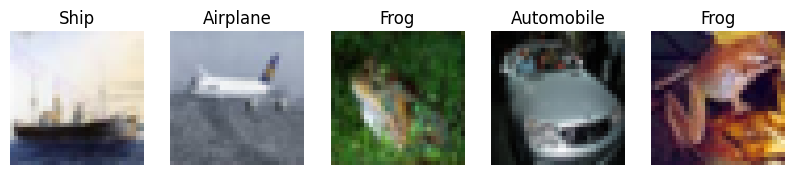


❌ Showing some incorrect predictions...


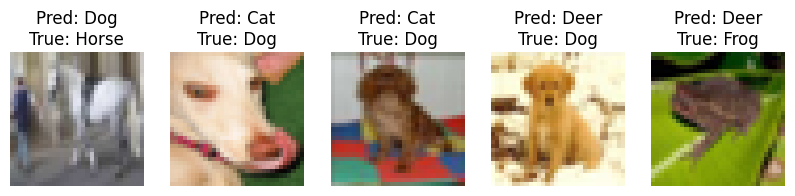

In [27]:
# 10. VISUALIZE CORRECT & INCORRECT PREDICTIONS
correct = np.where(y_pred_classes == y_test)[0]
incorrect = np.where(y_pred_classes != y_test)[0]

print('\n👍 Showing some correct predictions...')
plt.figure(figsize=(10,4))
for i, idx in enumerate(correct[:5]):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test[idx])
    plt.title(class_names[y_pred_classes[idx]])
    plt.axis('off')
plt.show()

print('\n❌ Showing some incorrect predictions...')
plt.figure(figsize=(10,4))
for i, idx in enumerate(incorrect[:5]):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test[idx])
    plt.title(f'Pred: {class_names[y_pred_classes[idx]]}\nTrue: {class_names[y_test[idx]]}')
    plt.axis('off')
plt.show()

---
## Observations & Conclusion

- The notebook trains a simple CNN with 2 convolutional layers and 2 max-pooling layers as required.
- CIFAR-10 contains 60,000 RGB images of 10 classes (32x32 pixels).
- You can improve performance by adding data augmentation, dropout, batch normalization, or deeper networks.

